In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm

In [25]:
dados = pd.read_csv("datasets/salarios.csv", sep = "\t")
dados2 = pd.read_csv("datasets/salarios2.csv", sep = "\t")

In [26]:
dados2.head()

,salario,anos_exp,anos_estudo
0,2500,3,12
1,23000,35,15
2,15000,25,18
3,5000,7,10
4,2541,4,12


# Matriz de Correlação

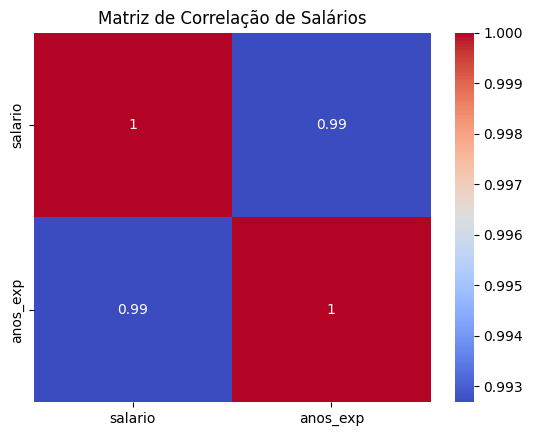

In [27]:
# Calculando a matriz de correlação
matriz_correlação = dados.corr()
matriz_correlação2 = dados2.corr()

sns.heatmap(matriz_correlação, annot = True, cmap = 'coolwarm')
plt.title('Matriz de Correlação de Salários')
plt.show()

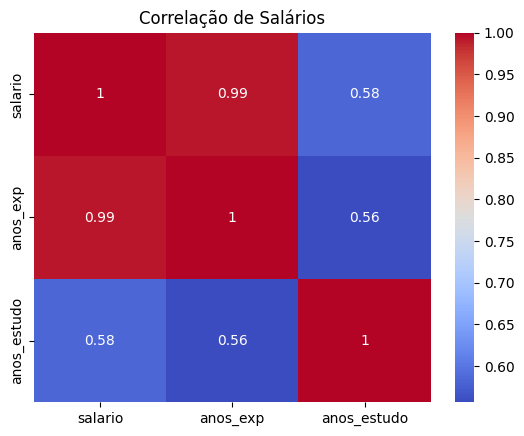

In [28]:
sns.heatmap(matriz_correlação2, annot=True, cmap='coolwarm')
plt.title('Correlação de Salários')
plt.show()

# Regressão Linear Simples

In [29]:
# Forma de uma regressão linear (equação de primeiro grau)
# Y = b0 + b1 * X

# Declarando o modelo;
# n_jobs indica a quantidade de processos paralelos que vão calcular a regressão linear
# fit_intercet = False, indica que não há constante na equação criada, uso raro!

model = LinearRegression(n_jobs = None, fit_intercept = True)

# X: variável explicativa, tem que ser produzido como array bidimensional, para acomodar múltiplas variáveis por observação.
x = dados2['anos_exp'].to_numpy().reshape(-1, 1)

# Y: é um array unidimensional, pois só há uma variável sendo prevista
y = dados2['salario'].to_numpy()

# Faz a modelagem da regressão linear, calculando o intercepto e o coeficiente angular
model.fit(x, y)

# Score calcula o r-quadrado
print(model.score(x, y)) 
# regressão linear simples: '0.9854136517127601' 
# regressão linear múltipla: '0.9868462044575526' 

# Complexidade de um algoritmo indica o tempo de processamento em função da quantidade de dados
# rls:  O(n)
# rlm:  O(n²)

# R-quadrado varia de 0 a 1.
# 1 é o melhor possível, 0 é o pior possível

0.9854136517127601


# Regressão Linear Múltipla

In [30]:
# Forma de uma regressão linear (equação de primeiro grau)
# Y = b0 + b1 * X

# Declarando o modelo;
# n_jobs indica a quantidade de processos paralelos que vão calcular a regressão linear
# fit_intercet = False, indica que não há constante na equação criada, uso raro!

model = LinearRegression(n_jobs = None, fit_intercept = True)

# X: variável explicativa, tem que ser produzido como array bidimensional, para acomodar múltiplas variáveis por observação.
x = dados2[['anos_exp', 'anos_estudo']].to_numpy()

# Y: é um array unidimensional, pois só há uma variável sendo prevista
y = dados2['salario'].to_numpy()

# Faz a modelagem da regressão linear, calculando o intercepto e o coeficiente angular
model.fit(x, y)

# Score calcula o r-quadrado
print(model.score(x, y)) 
# regressão linear simples: '0.9854136517127601' 
# regressão linear múltipla: '0.9868462044575526' 

# Complexidade de um algoritmo indica o tempo de processamento em função da quantidade de dados
# rls:  O(n)
# rlm:  O(n²)

# R-quadrado varia de 0 a 1.
# 1 é o melhor possível, 0 é o pior possível

0.9868462044575526


# Modelo de mínimos quadrados ordinários (OLS)

In [31]:
model = LinearRegression(n_jobs = None, fit_intercept = True)

# X: variável explicativa, tem que ser produzido como array bidimensional, para acomodar múltiplas variáveis por observação.
x = dados2[['anos_exp', 'anos_estudo']].to_numpy()

# Y: é um array unidimensional, pois só há uma variável sendo prevista
y = dados2['salario'].to_numpy()

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     262.6
Date:                Mon, 11 Mar 2024   Prob (F-statistic):           2.61e-07
Time:                        11:29:50   Log-Likelihood:                -80.125
No. Observations:                  10   AIC:                             166.3
Df Residuals:                       7   BIC:                             167.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -547.5214   1151.630     -0.475      0.6

c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  k, _ = kurtosistest(a, axis)


In [32]:
Y = -547 + 618 * dados2['anos_exp'] + 76 * dados2['anos_estudo']
Y

0     2219
1    22223
2    16271
3     4539
4     2837
5     1449
6     8237
7     8855
8    12249
9     7933
dtype: int64

# Atividade

In [33]:
data = pd.read_csv("datasets/dados.csv", sep = ';')

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Entrevistado    80 non-null     int64 
 1   Sexo            80 non-null     object
 2   Idade           80 non-null     int64 
 3   Renda_familiar  80 non-null     object
 4   Região          80 non-null     object
 5   Amigos          80 non-null     int64 
 6   Esportes        80 non-null     int64 
 7   Balada          80 non-null     int64 
 8   Teatro          80 non-null     int64 
 9   Cinema          80 non-null     int64 
 10  Shows           80 non-null     int64 
 11  Filmes_Casa     80 non-null     int64 
 12  Gasto_Lazer     80 non-null     int64 
dtypes: int64(10), object(3)
memory usage: 8.3+ KB


In [37]:
# Declarando o modelo de regressão linear
model = LinearRegression(n_jobs = None, fit_intercept = True)

# Definindo as variáveis independentes (X) e a variável dependente (Y)
x = data[['Amigos', 'Esportes', 'Balada', 'Teatro', 'Cinema', 'Shows', 'Filmes_Casa', 'Idade']].values
y = data['Gasto_Lazer'].values

# Fazendo a modelagem da regressão linear
model.fit(x, y)

# Calculando o R-quadrado do modelo
r_quadrado = model.score(x, y)
print("R-quadrado:", r_quadrado)


R-quadrado: 0.2811487191357118


In [36]:
model = LinearRegression(n_jobs = None, fit_intercept = True)

x = data[['Amigos', 'Esportes', 'Balada', 'Teatro', 'Cinema', 'Shows', 'Filmes_Casa', 'Idade']].to_numpy()
y = data['Gasto_Lazer'].to_numpy()

model.fit(x, y)

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     3.471
Date:                Mon, 11 Mar 2024   Prob (F-statistic):            0.00197
Time:                        11:29:51   Log-Likelihood:                -608.04
No. Observations:                  80   AIC:                             1234.
Df Residuals:                      71   BIC:                             1256.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -148.6834    567.150     -0.262      0.7